<h1><span style="color:green" font-weight: bold><center>   Compte rendu Tp2:   Segmentation</center> </span></h1>
<h6><span font-weight: bold> Ines Eddai 3DNI1</span><h6/>

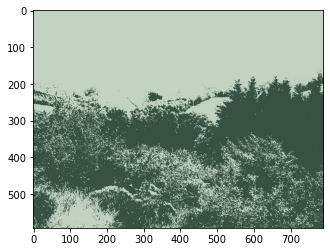

In [11]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('paysage1.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('paysage1.jpg', quant)
plt.imshow(image)

cv2.imread('paysage1.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

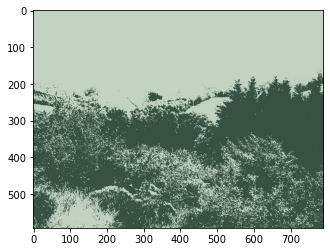

In [12]:
plt.imshow(image)

In [13]:
!pip install opencv-python

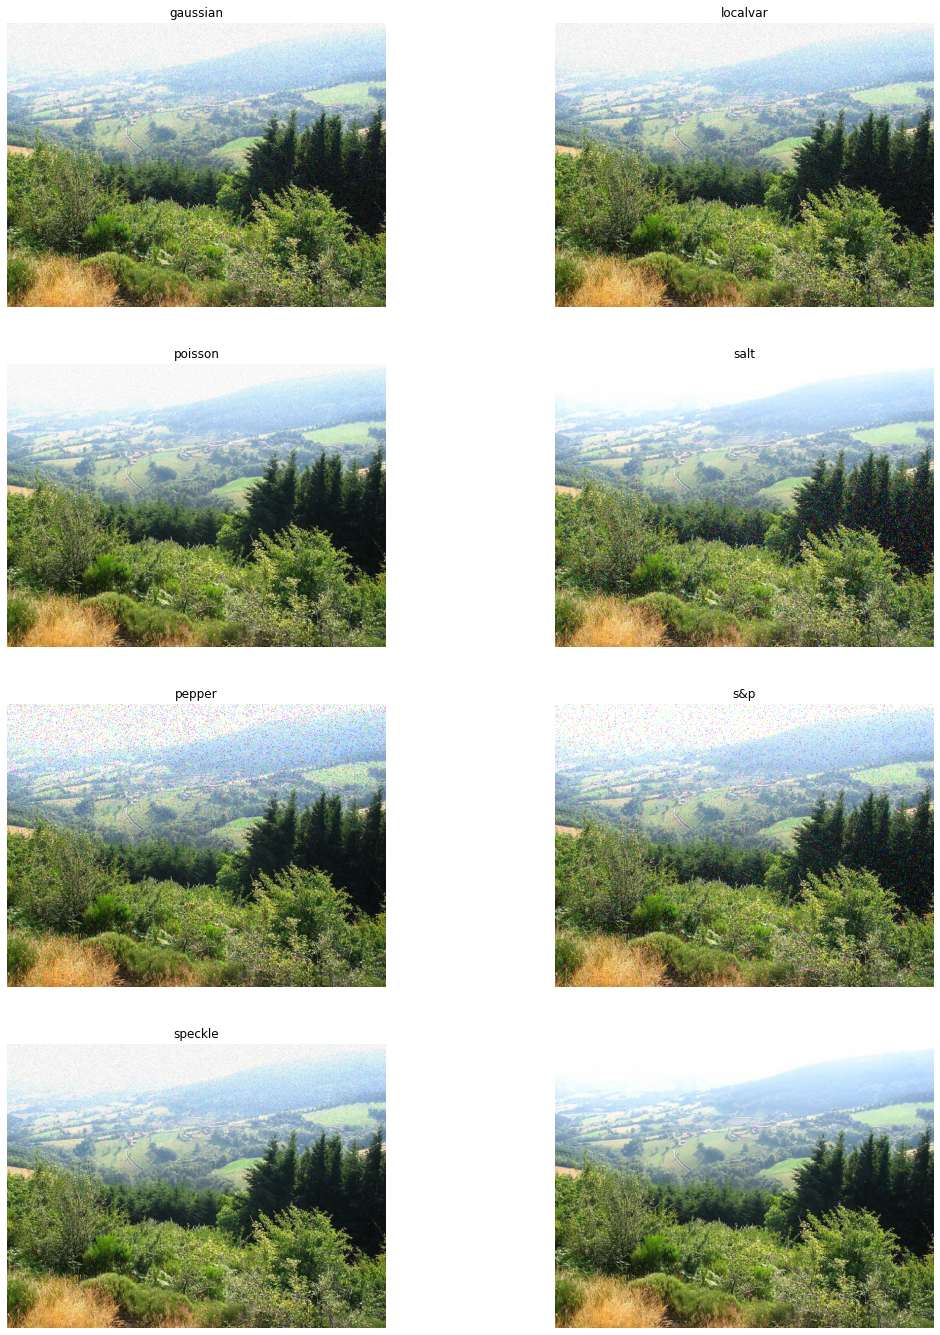

In [14]:
import skimage.io
import matplotlib.pyplot as plt
img_path="paysage.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


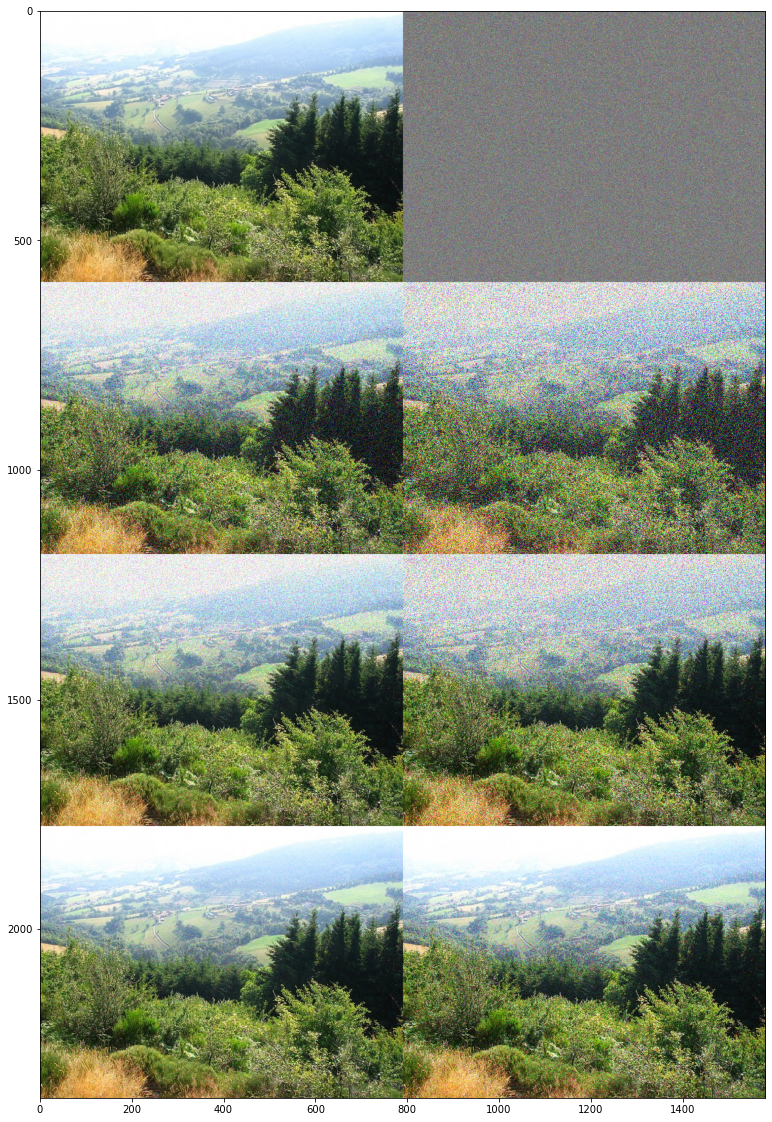

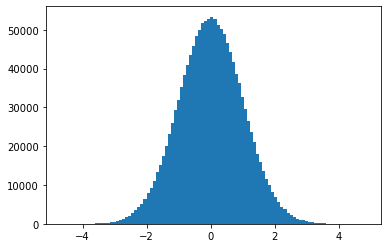

In [15]:
import cv2
img_path="paysage.jpg"
img = cv2.imread(img_path)[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))



plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()


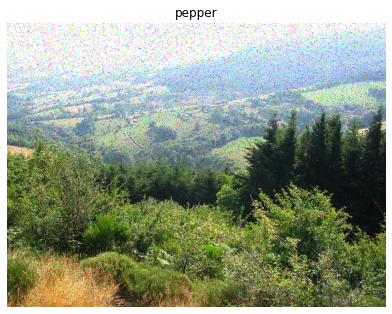

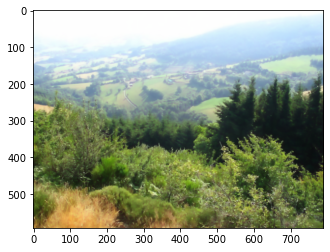

In [16]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="paysage.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "pepper", r,c,3)
plt.show()
denoised_image = denoise_tv_chambolle(img,
weight=0.1,
multichannel=True)
# Show denoised image
#plt.imshow(img)
plt.imshow(denoised_image)

In [17]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="paysage.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="paysage.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt"]);

 
plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt'), value=…

In [18]:
def segm(k):
    image = cv2.imread('paysage.jpg')
    (h1, w1) = image.shape[:2]

 

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

 

    image = image.reshape((image.shape[0] * image.shape[1], 3))

 


    clt = KMeans(n_clusters = k)

 

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

 

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

 

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

 

    plt.figure(figsize=(10,11))
    cv2.imwrite('paysage1.jpg', quant)
    return plt.imshow(image)
plt.show()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(segm,k=widgets.IntSlider(min=2, max=4, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=4, min=2), Output()), _dom_classes=('widget-inte…